In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("telco-data.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

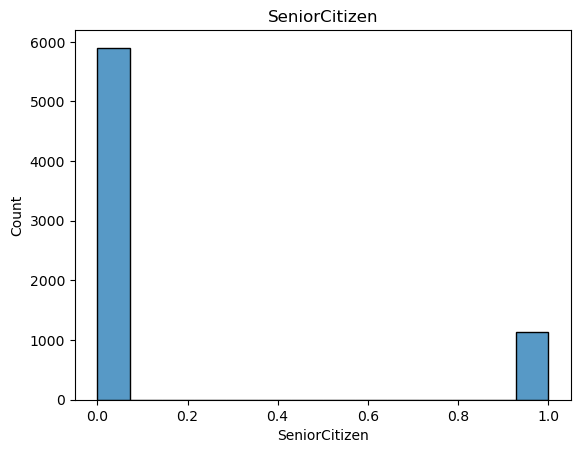

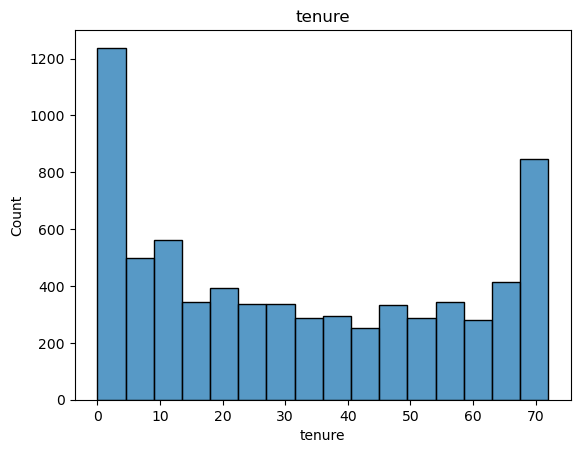

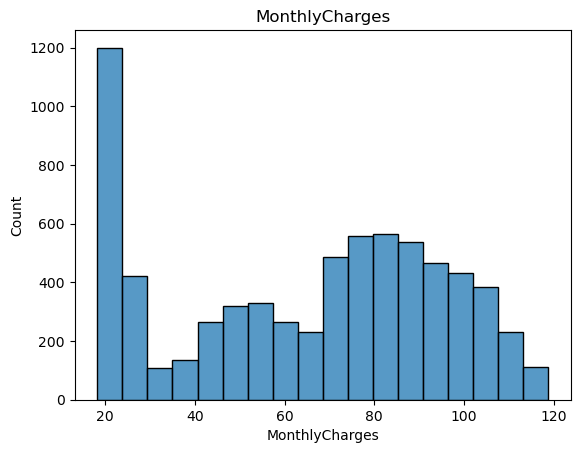

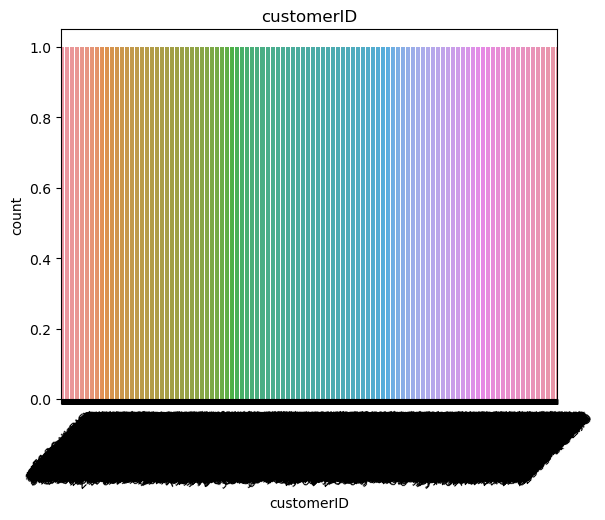

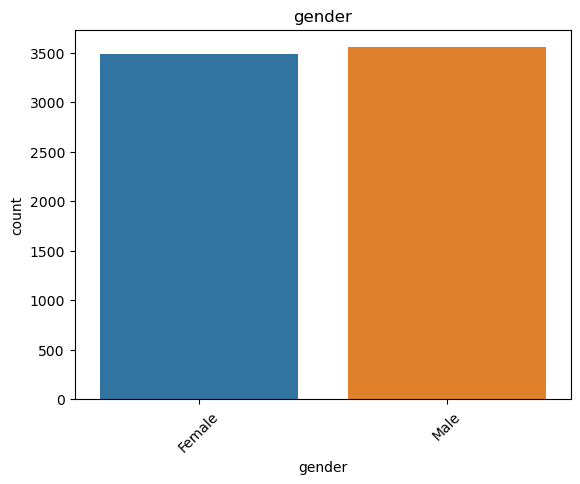

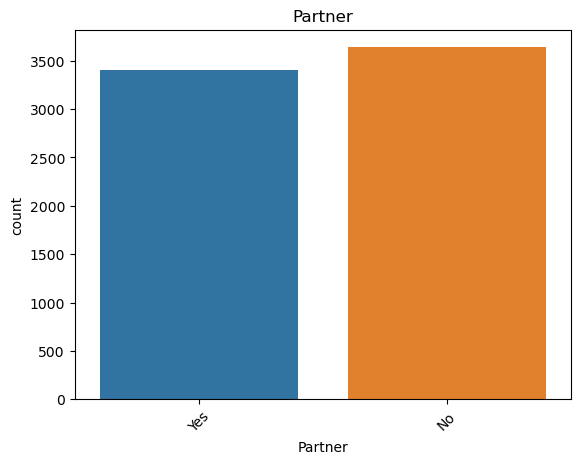

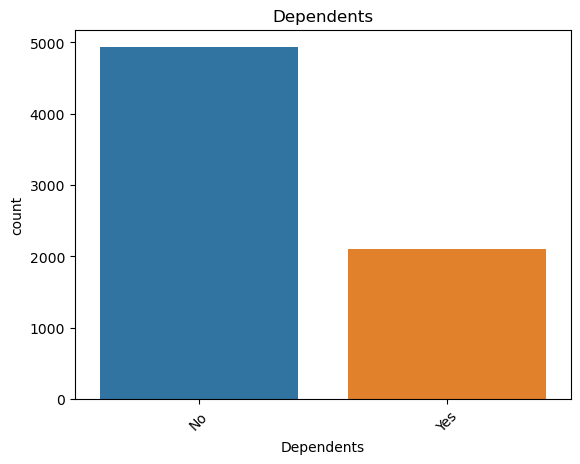

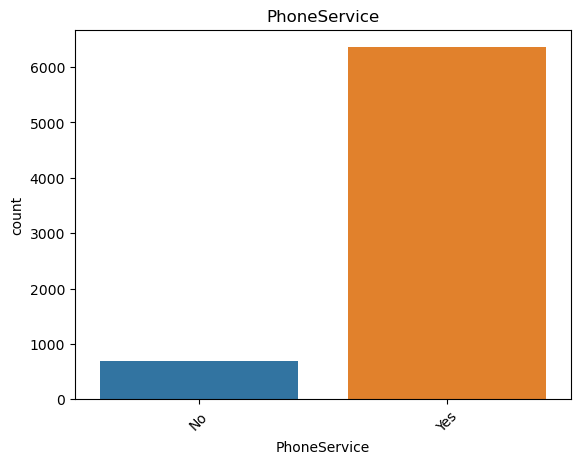

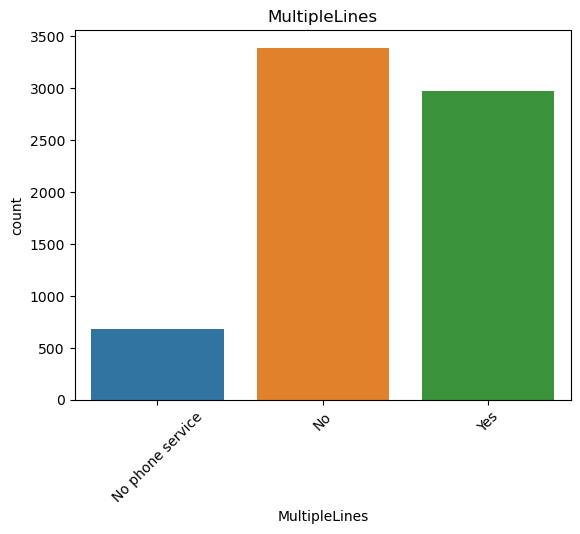

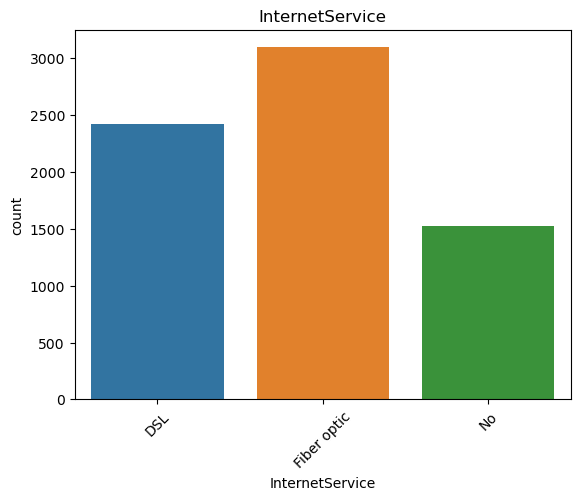

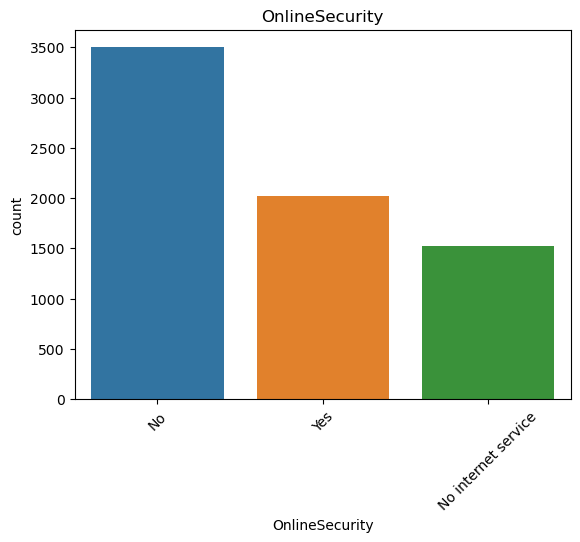

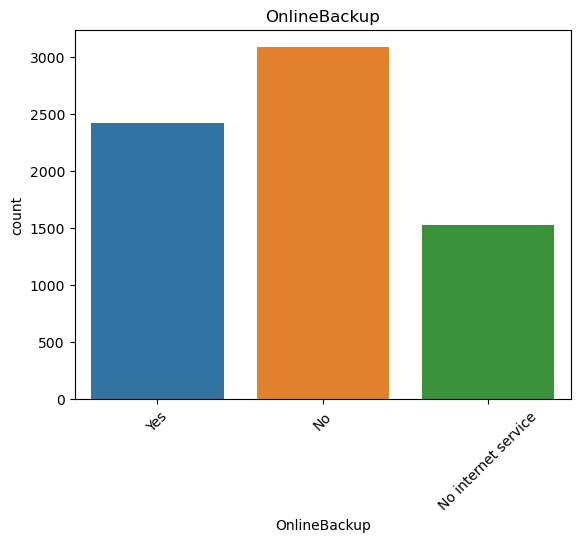

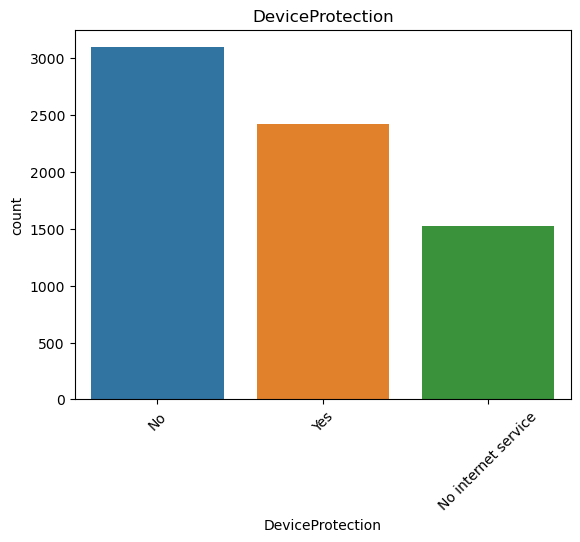

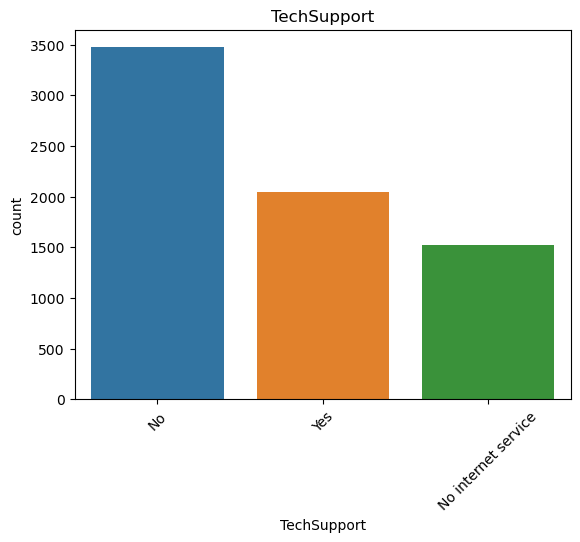

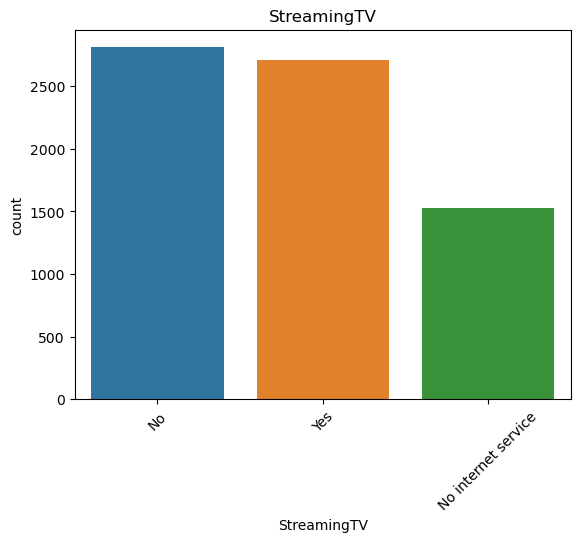

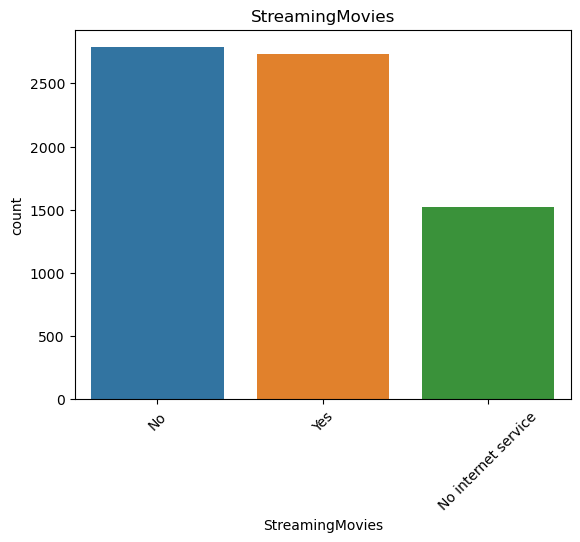

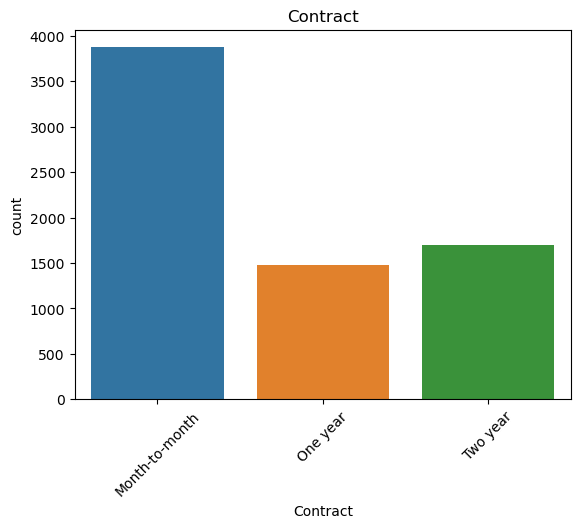

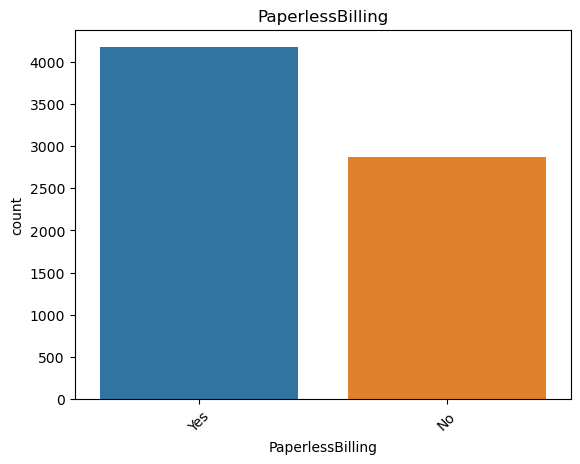

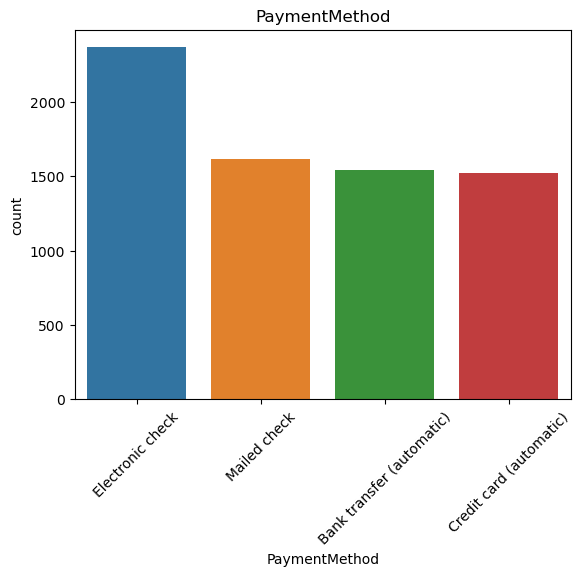

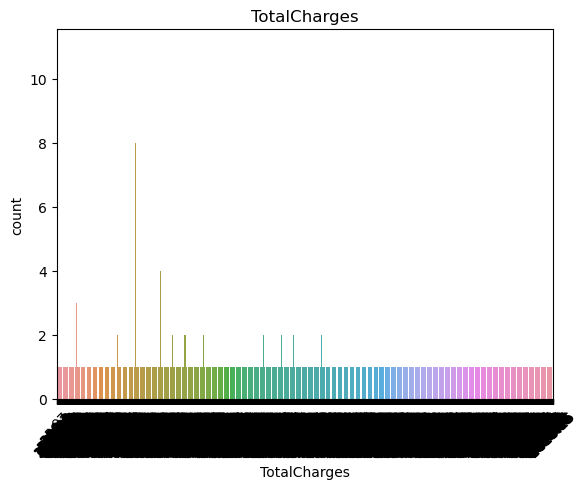

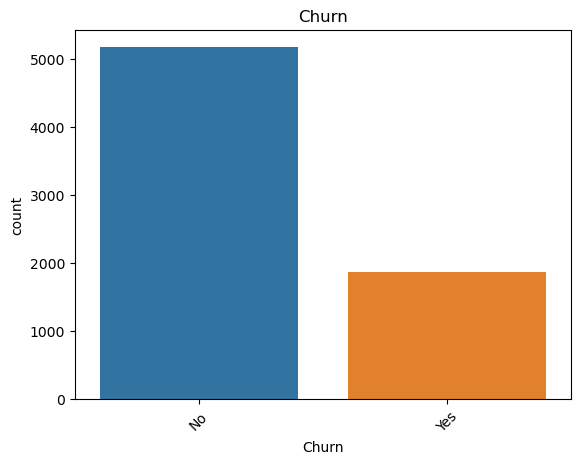

In [5]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col])
    plt.title(col)
    plt.show()
    
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [6]:
churn_grouped = df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean(numeric_only=True)
print(churn_grouped)

       MonthlyCharges
Churn                
No          61.265124
Yes         74.441332


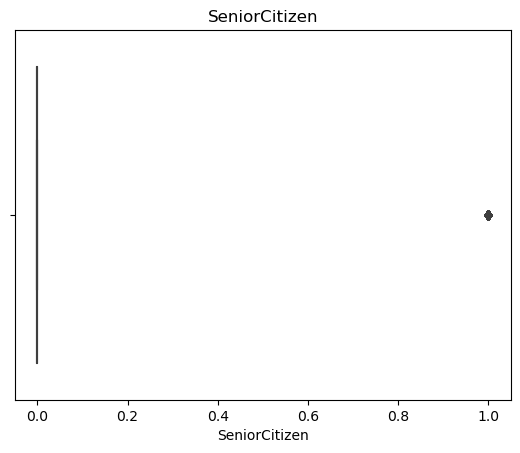

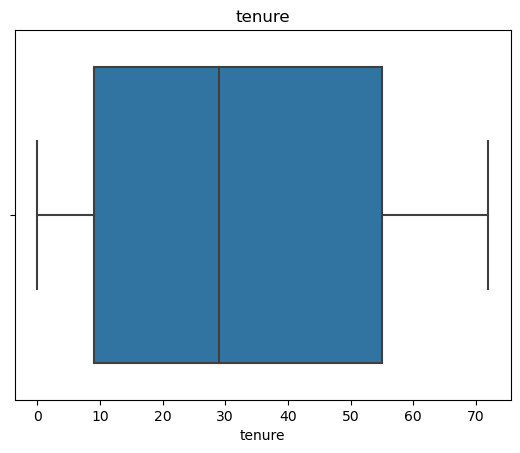

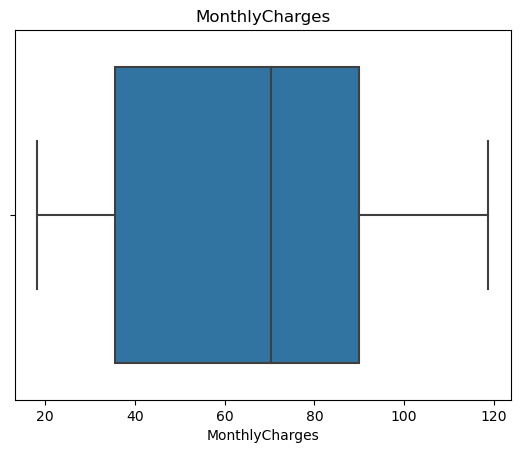

In [7]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [8]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_df = pd.concat([missing_values, missing_percentages], axis=1)
missing_df.columns = ['Missing Values', 'Missing Percentage']
print(missing_df)

                  Missing Values  Missing Percentage
customerID                     0                 0.0
gender                         0                 0.0
SeniorCitizen                  0                 0.0
Partner                        0                 0.0
Dependents                     0                 0.0
tenure                         0                 0.0
PhoneService                   0                 0.0
MultipleLines                  0                 0.0
InternetService                0                 0.0
OnlineSecurity                 0                 0.0
OnlineBackup                   0                 0.0
DeviceProtection               0                 0.0
TechSupport                    0                 0.0
StreamingTV                    0                 0.0
StreamingMovies                0                 0.0
Contract                       0                 0.0
PaperlessBilling               0                 0.0
PaymentMethod                  0              

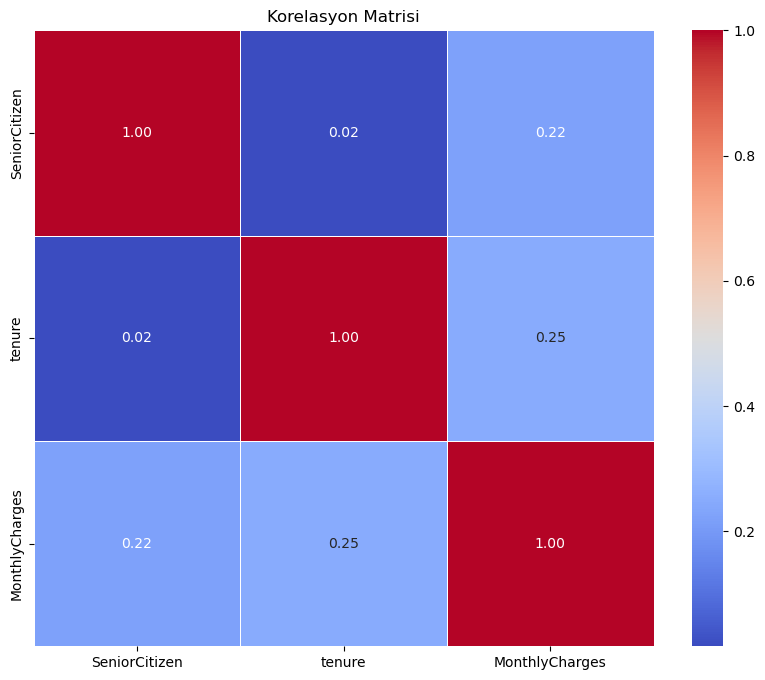

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


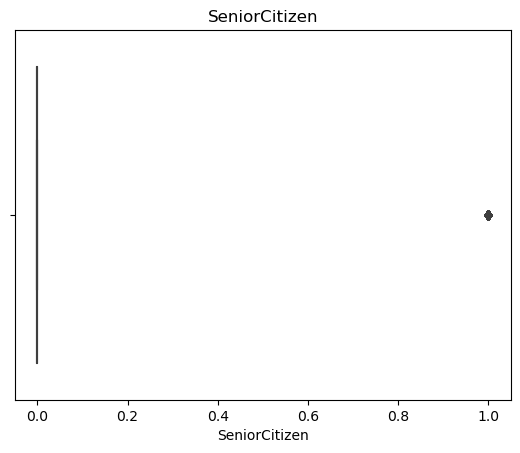

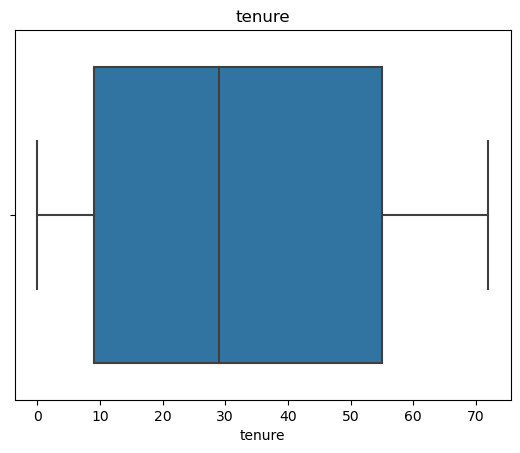

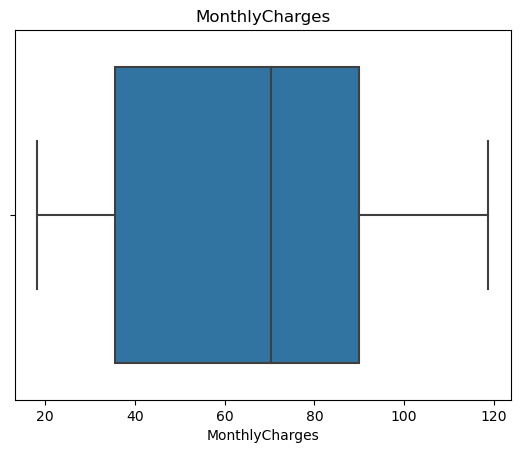

In [10]:
print(df.isnull().sum())

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [11]:
df['ServiceDuration'] = df['tenure'] * df['MonthlyCharges']

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

df['ServiceDuration'] = df['tenure'] * df['MonthlyCharges']
df['ChargesRatio'] = df['TotalCharges'] / df['MonthlyCharges']

numeric_cols.append('ServiceDuration')
numeric_cols.append('ChargesRatio')

In [12]:
categorical_cols.remove('Churn')  
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df = df_encoded

In [24]:
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'ServiceDuration', 'ChargesRatio']

X = df[numeric_cols]
y = df['Churn']

X_copy = X.copy()
X_copy.fillna(0, inplace=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Churn', axis=1)
y = df['Churn']

X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7693399574166075
